# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with GDP data taken from the International Monetary Fund.

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [254]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
#import folium
#from folium.plugins import MarkerCluster

# Problem 1 - Data Handling
The basis of your work will be the following GDP dataset:

In [255]:
gdp = pd.read_csv("GDP_IMF.csv", sep=";")
gdp.head(5)

,Country,year,GDP
0,Afghanistan,1992,no data
1,Albania,1992,0.843
2,Algeria,1992,49.217
3,Andorra,1992,no data
4,Angola,1992,9.395


#### a)
As you can see, there are many missing values in the data. <br>
Before you can continue, you need to handle them. Proceed as follows:
- Delete those countries with no data at all (if any)
- Either delete the missing years for each country or use the years close by to approximate the missing value <br> *Example: Year 2004 is missing, but 2003 and 2005 are available; use the mean of GDP in 2003 and 2005 to replace missing year 2004.*

In [256]:
# Pivot Dataframe into a clearer structure and set index
pivot_gdp = gdp.pivot(index='Country', columns='year', values='GDP')

In [257]:
# Replace "no data" with NaN for better handling and then check for the amount of NaN entries
pivot_gdp.replace('no data', np.nan, inplace=True)
pivot_gdp['NaN_count'] = pivot_gdp.isna().sum(axis=1)

In [258]:
# There is no country with no entries at all
pivot_gdp[pivot_gdp['NaN_count'] == 37]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Text(0, 0.5, 'Anzahl')

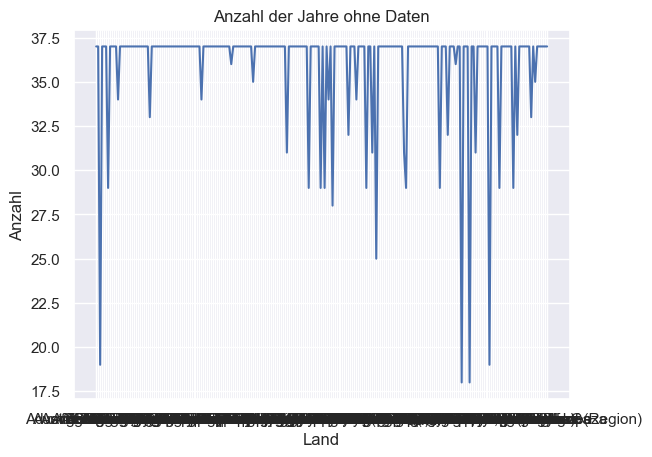

In [260]:
#Plot 
plt.plot(37-pivot_gdp["NaN_count"])
plt.title ("Anzahl der Jahre ohne Daten")
plt.xlabel("Land")
plt.ylabel("Anzahl")

In [75]:
# All countries with an NaN count for => 9 years are dropped
# This means they have less than 75% of the total timespan of 30 years covered
# Qualitative analysis also showed that most of their NaN values where next to each other which made them less suitable for interpolation

gdp_clean = pivot_gdp[pivot_gdp['NaN_count'] < 9]

In [77]:
# Convert entries to numeric
gdp_clean2 = gdp_clean.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [78]:
# Fill NaNs with the average of the surrounding values where it is possible
# (window set at five limits the amount of NaNs that can be filled this way)
# Fill the remaining NaNs via interpolation

final_gdp = gdp_clean2.fillna(gdp_clean2.rolling(5, min_periods=2, center=True, axis=1).mean())
final_gdp2 = final_gdp.interpolate(method='linear', axis=1, limit_direction='both')

In [81]:
#Short check if there a still NaN-Values
final_gdp2['NaN_count2'] = final_gdp2.isna().sum(axis=1)
final_gdp2[final_gdp2['NaN_count2'] > 0]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,


#### b)
We are only interested in the data on a country level and for years already passed. <br>
The dataset, however, also contains information on whole regions such as the EU or G7. <br>
It also contains predictions for GDP in the upcoming years. <br>
Delete these observations from the data. <br>
*Hint: Get a list of all unique values of the Country column.*

In [82]:
# Drop years in the future
final_gdp2.drop(columns=[2023,2024,2025,2026,2027,2028], axis=0, inplace=True)

In [84]:
# Generate a list of all countries to eliminate Regions and other umbrella terms via visual inspection
final_gdp2.index.values.tolist()

['ASEAN-5',
 'Advanced economies',
 'Africa (Region)',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific',
 'Australia',
 'Australia and New Zealand',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Central America',
 'Central Asia and the Caucasus',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia',
 'Eastern Europe ',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Emerging and Develo

In [85]:
# Create blacklist
blacklist = ['ASEAN-5', 'Advanced economies', 'Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia and the Caucasus', 'East Asia','Eastern Europe ', 'Emerging and Developing Asia', 'Emerging and Developing Europe', 'Emerging market and developing economies',  'Euro area', 'Europe', 'European Union', 'Latin America and the Caribbean', 'Major advanced economies (G7)',  'Middle East (Region)', 'Middle East and Central Asia',  'North Africa', 'North America',  'Other advanced economies', 'Pacific Islands ',  'South America', 'South Asia', 'Southeast Asia',  'Sub-Saharan Africa (Region) ',  'Sub-Saharan Africa',  'West Bank and Gaza', 'Western Europe', 'Western Hemisphere (Region)', 'World']

In [86]:
# Drop blacklist
final_gdp3 = final_gdp2.drop(blacklist)

# Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [87]:
# Insert your code here.

#### b)
Pick a year with as little missing values as possible. <br>
For this year, create an interactive map with `folium` that tells you the GDP in the country in the given year. <br>
*Hint: Be cautious with country names.*

In [88]:
# Insert your code here.

# Problem 3 - Supervised Machine Learning
#### a)
First, try to predict the GDP in a given year and in a given country using the data from the past years. <br>
Report the performance (measured in mean squared error) for different numbers of lags. 

In [89]:
# Import the libraries
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [90]:
# Transform and Normalize GDP-Data
df_supervised = pd.DataFrame.transpose(final_gdp3)
df_supervised = df_supervised.drop(["NaN_count", "NaN_count2"])
df_supervised_norm = (df_supervised - df_supervised.mean())/df_supervised.std()

# Check for null-values
df_supervised_norm[df_supervised_norm.isnull().any(axis=1)]

Country,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,


In [91]:
# Define Linear Regression model and List of countrys
model_lin = LinearRegression(fit_intercept = True)
countrys = df_supervised_norm.columns.values

In [92]:
# 1. Create a working data frame out of the big dataframe for every country
# 2. Shift all independent variables for a maximum of 5 lags and exclude the values of the current year
# 3. Set the GDP as the dependent variable
# 4. Train the model

max_lag = 5
Results = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results.loc[len(Results)] = new_row



In [93]:
# Group the results
Results = Results.groupby(["Country"]).agg('sum')

In [94]:
# Investigate the head
Results.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.011117,0.014210,0.007611,0.024529,0.036404
Algeria,0.081713,0.083712,0.046907,0.052259,0.128371
Andorra,0.041531,0.028305,0.077305,0.134768,0.046322
Angola,0.235800,0.240116,0.125731,0.153186,0.338172
Antigua and Barbuda,0.221158,0.224911,0.194753,0.193524,0.179940


In [95]:
print("Average MSE for 1 lag is: ", pd.Series.mean(Results["MSE_lag1"]))
print("Average MSE for 2 lags is: ", pd.Series.mean(Results["MSE_lag2"]))
print("Average MSE for 3 lags is: ", pd.Series.mean(Results["MSE_lag3"]))
print("Average MSE for 4 lags is: ", pd.Series.mean(Results["MSE_lag4"]))
print("Average MSE for 5 lags is: ", pd.Series.mean(Results["MSE_lag5"]))

Average MSE for 1 lag is:  0.09333258205030387
Average MSE for 2 lags is:  0.09820506569756104
Average MSE for 3 lags is:  0.06882933899900413
Average MSE for 4 lags is:  0.08256115552022665
Average MSE for 5 lags is:  0.11243771830486163


**General Interpretation**
- model with 3 lags (data from three years prior) yields the lowest MSE making it the most accurate for predicting next year's GDP 
- model with 5 lags is the least accurate, implying that older data may not be as effective for the prediction

**Interpetation of specific countries with elevated MSE values**
- ....

#### b)
Now, see if you can improve the prediction with additional data. <br>
In this task, you are supposed to be creative and use your intuition. What could be important predictors? Think of, for example:
- Country characteristics such as population, unemployment rates etc. <br> *Hint: You can search for official statistics, e.g., from OECD.*
- Major historical events such as wars, natural disasters etc. <br> *Hint: You can make dummy variables if such an event happened for given country and year.*
- Geographical information such as continent.

*Note: It is well possible that you can't find data on very small countries. If you don't find data for some countries, you can drop them.*

**Prepocessing CSV Files**

In [96]:
# Insert your code here.
imports = pd.read_csv("TDS1/Importe.csv", sep=",")
exports = pd.read_csv("TDS1/Exporte.csv", sep=",")
population = pd.read_csv("TDS1/Populations.csv", sep = ",")
unemployment = pd.read_csv("TDS1/Arbeitslosenraten.csv", sep = ",")
nat_disasters = pd.read_csv("TDS1/natural-disasters.csv", sep = ",")

# Quellen noch rausschreiben

**Imports**

In [97]:
imports.drop(imports.iloc[:, 1:36], inplace = True, axis = 1)
imports.drop(["Unnamed: 67"], inplace = True, axis = 1)
imports.rename(columns={'Country Name': 'Country'}, inplace=True)
imports.set_index(keys='Country', inplace=True)

In [98]:
# Investigate NaN
imports['NaN_count'] = imports.isna().sum(axis=1)

In [99]:
# Drop all rows with >= 9 NaN
imports_clean = imports[imports['NaN_count'] < 9]

In [100]:
imports_clean.drop(['NaN_count'], axis=1, inplace=True)
imports_clean = imports_clean.fillna(imports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
imports_clean = imports_clean.interpolate(method='linear', axis=1, limit_direction='both')

C:\Users\Alina\AppData\Local\Temp\ipykernel_5544\1395835386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean.drop(['NaN_count'], axis=1, inplace=True)


**Exports**

In [101]:
exports.drop(exports.iloc[:, 1:36], inplace = True, axis = 1)
exports.drop(["Unnamed: 67"], inplace = True, axis = 1)
exports.rename(columns={'Country Name': 'Country'}, inplace=True)
exports.set_index(keys='Country', inplace=True)

In [102]:
# Investigate NaN
exports['NaN_count'] = exports.isna().sum(axis=1)

In [103]:
# Drop all rows with >= 9 NaN
exports_clean = exports[exports['NaN_count'] < 9]

In [104]:
exports_clean.drop(['NaN_count'], axis=1, inplace=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_5544\3056136356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_clean.drop(['NaN_count'], axis=1, inplace=True)


In [105]:
exports_clean = exports_clean.fillna(exports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
exports_clean = exports_clean.interpolate(method='linear', axis=1, limit_direction='both')

**Population**

In [106]:
population.drop(population.iloc[:, 1:36], inplace = True, axis = 1)
population.drop(["Unnamed: 67"], inplace = True, axis = 1)
population.rename(columns={'Country Name': 'Country'}, inplace=True)
population.set_index(keys='Country', inplace=True)

In [107]:
# Investigate NaN - No NaN values in the dataset
population['NaN_count'] = population.isna().sum(axis=1)


In [108]:
population = population.drop(columns=["NaN_count"])

**Unemployment**

In [109]:
unemployment.drop(unemployment.iloc[:, 1:5], inplace = True, axis = 1)
unemployment.drop(["Flag Codes"], inplace = True, axis = 1)
unemployment_piv = unemployment.pivot(index='LOCATION', columns='TIME', values='Value')

In [110]:
unemployment_piv.isna().sum(axis=1).sum()

147

In [111]:
unemployment_piv
# hat nur 35 verwertbare Länder - evtl. am Ende nutzen und Einfluss auf Regression für diese 35 Länder messen

TIME,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUS,10.728140,10.874670,9.722190,8.472281,8.506114,8.362488,7.677429,6.873791,6.285546,6.742173,...,5.661940,6.077244,6.056423,5.710809,5.595881,5.307670,5.166878,6.463281,5.113611,3.705759
AUT,NaN,3.958333,4.241667,4.241667,4.733333,4.733333,4.725000,4.150000,3.933333,3.983333,...,5.725000,6.033333,6.150000,6.450000,5.925000,5.208333,4.841667,6.025000,6.200000,4.758333
BEL,7.091667,8.625000,9.750000,9.675000,9.541667,9.216666,9.341666,8.400000,6.875000,6.591667,...,8.550000,8.658334,8.650000,7.850000,7.100000,5.958333,5.366667,5.541667,6.275000,5.575000
CAN,11.191670,11.400000,10.416670,9.508333,9.608334,9.116667,8.283334,7.591667,6.816667,7.216667,...,7.150000,7.033333,6.941667,7.025000,6.425000,5.841667,5.691667,9.691667,7.541667,5.300000
CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.747292,4.829988,4.800639,4.919180,4.797587,4.714414,4.394452,4.815328,5.098192,4.299916
CHL,6.665000,6.542500,7.815000,7.302500,6.325000,6.115000,6.395000,10.137500,9.667500,9.852500,...,6.082220,6.495096,6.328377,6.684913,6.965175,7.376639,7.222640,10.770240,8.861450,7.878028
COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.742500,9.205000,8.950833,9.226666,9.295834,9.529166,10.370830,15.864170,13.810830,11.218330
CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.386163,9.617385,9.612973,9.537852,9.071724,10.264050,11.755390,19.606880,16.433370,12.218830
CZE,NaN,4.308333,4.291667,4.008333,3.891667,4.775000,6.466667,8.700000,8.775000,8.125000,...,6.966667,6.116667,5.058333,3.966667,2.908333,2.266667,2.016667,2.550000,2.808333,2.400000


**Natural disasters**

In [112]:
nat_disasters = nat_disasters[["Country name", "Year", "Number of total people affected by drought"]]
nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)
nat_dis_piv = nat_disasters.pivot(index='Country', columns='Year', values='Number of total people affected by drought')


In [113]:
nat_dis_piv.drop(nat_dis_piv.iloc[:, 0:92], inplace = True, axis = 1)

# Wenn NaN Eintragung dann bedeutet das, dass keine Naturkatastrophe stattgefunden hat, wir ersetzen mit "0 Betroffenen" damit wir die Variable als numerischen Regressor benutzen können
# oder alternativ könnten wir es auch noch in eine kategorische Dummy variable umwandeln
nat_dis_piv.fillna(0, inplace=True)

In [114]:
nat_dis_piv.head(3)

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2580000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13500000.0,0.0,0.0,11000000.0,0.0
Africa,7000000.0,2346507.0,1200000.0,1811994.0,4942000.0,1477100.0,236700.0,36019545.0,231290.0,13054558.0,...,5080000.0,6795326.0,30331228.0,11641000.0,16561874.0,1226600.0,6983000.0,21526000.0,34062500.0,31356261.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
#Clean DataFrames 
blacklist_nat_dis = ["Africa", "American Samoa", "East Germany", "Netherlands Antilles", "North Yemen", "Serbia and Montenegro", "South Yemen", "Somalia", "South Sudan", "United States Virgin Islands", "West Germany"]
blacklist_pop = ["American Samoa", "Somalia", "South Sudan"]

nat_dis_piv = nat_dis_piv.drop(blacklist_nat_dis)
population = population.drop(blacklist_pop)

In [117]:
# MATCH THE COUNTRY NAMES
# 1. Clean all new dataframes of the blacklist
# 1. Handle NaNs
# 2. Ensure that the column with the country names is called "country"
# 3. Standardize country names using fuzzywuzzy, a string matching library in python.
#    A warning is printed if the matched name has a similarity score below 90%, also we use copies of the original dataframes

from fuzzywuzzy import process

def match_countries(df, countries):
    df_copy = df.copy()
    matches = []
    for country in df_copy.index:
        match, score = process.extractOne(country, countries)
        if score < 90:
            continue
            #print(f"Low match score: {country} matched with {match} with score {score}")
        elif score < 99:
            print(f"Warning! Middle match score: {country} matched with {match} with score {score}")
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
        else:
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
    df_copy = df_copy[df_copy.index.isin(matches)]
    return df_copy

countries = final_gdp3.index.unique()

print("Importe:")
imp_clean_copy = match_countries(imports_clean, countries)
print("Exporte:")
exp_clean_copy = match_countries(exports_clean, countries)
print("Nat_Dis:")
nat_dis_clean_copy = match_countries(nat_dis_piv, countries)
print("Population:")
pop_clean_copy = match_countries(population, countries)



Importe:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Rep. matched with Congo, Republic of  with score 90
Warning! Middle match score: Egypt, Arab Rep. matched with Egypt with score 90
Warning! Middle match score: Hong Kong SAR, China matched with Hong Kong SAR with score 90
Warning! Middle match score: St. Kitts and Nevis matched with Saint Kitts and Nevis with score 90
Warning! Middle match score: Korea, Rep. matched with Korea, Republic of with score 90
Warning! Middle match score: Sao Tome and Principe matched with Sao Tome und Principe with score 95
Warning! Middle match score: St. Vincent and the Grenadines matched with Saint Vincent and the Grenadines with score 94
Warning! Middle match score: Venezuela, RB matched with Venezuela with score 95
Exporte:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Dem. Rep. matched with 

In [118]:
final_gdp3 = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])

In [119]:
# Normalize the numerical data

imp_clean_copy_norm = (imp_clean_copy - imp_clean_copy.mean())/imp_clean_copy.std()
exp_clean_copy_norm = (exp_clean_copy - exp_clean_copy.mean())/exp_clean_copy.std()
nat_dis_clean_copy_norm = (nat_dis_clean_copy - nat_dis_clean_copy.mean())/nat_dis_clean_copy.std()
pop_clean_copy_norm = (pop_clean_copy - pop_clean_copy.mean())/pop_clean_copy.std()
final_gdp3_norm = (final_gdp3 - final_gdp3.mean())/final_gdp3.std()

In [120]:
#Ensure type of all Column Names is identical (integer)

imp_clean_copy_norm.columns = imp_clean_copy_norm.columns.astype(int)
exp_clean_copy_norm.columns = exp_clean_copy_norm.columns.astype(int)
nat_dis_clean_copy_norm.columns = nat_dis_clean_copy_norm.columns.astype(int)
pop_clean_copy_norm.columns = pop_clean_copy_norm.columns.astype(int)
final_gdp3_norm.columns = final_gdp3_norm.columns.astype(int)

In [126]:
print("Number of Duplicates in Import Dataframe: ", len(imp_clean_copy_norm[imp_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Export Dataframe: ", len(exp_clean_copy_norm[exp_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Population Dataframe: ", len(pop_clean_copy_norm[pop_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Natural Disasters Dataframe: ", len(nat_dis_clean_copy_norm[nat_dis_clean_copy_norm.index.value_counts() > 1]))

Number of Duplicates in Import Dataframe:  0
Number of Duplicates in Export Dataframe:  0
Number of Duplicates in Population Dataframe:  0
Number of Duplicates in Natural Disasters Dataframe:  0


C:\Users\Alina\AppData\Local\Temp\ipykernel_5544\3849298297.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Import Dataframe: ", len(imp_clean_copy_norm[imp_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_5544\3849298297.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Export Dataframe: ", len(exp_clean_copy_norm[exp_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_5544\3849298297.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Population Dataframe: ", len(pop_clean_copy_norm[pop_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_5544\3849298297.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Natural Disasters

In [127]:
# Exclude all countries that are not in all dfs
all_countries = set(imp_clean_copy_norm.index).intersection(exp_clean_copy_norm.index, nat_dis_clean_copy_norm.index, pop_clean_copy_norm.index, final_gdp3_norm.index)

final_gdp3_norm = final_gdp3_norm[final_gdp3_norm.index.isin(all_countries)]
imp_clean_copy_norm = imp_clean_copy_norm[imp_clean_copy_norm.index.isin(all_countries)]
exp_clean_copy_norm = exp_clean_copy_norm[exp_clean_copy_norm.index.isin(all_countries)]
nat_dis_clean_copy_norm = nat_dis_clean_copy_norm[nat_dis_clean_copy_norm.index.isin(all_countries)]
pop_clean_copy_norm = pop_clean_copy_norm[pop_clean_copy_norm.index.isin(all_countries)]

In [132]:
print(len(final_gdp3_norm.index))
print(len(imp_clean_copy_norm))
print(len(exp_clean_copy_norm))
print(len(pop_clean_copy_norm))
print(len(nat_dis_clean_copy_norm))

118
118
118
118
118


In [133]:
# Sort index in all dataframes
imp_clean_copy_norm.sort_index(inplace=True)
exp_clean_copy_norm.sort_index(inplace=True)
nat_dis_clean_copy_norm.sort_index(inplace=True)
pop_clean_copy_norm.sort_index(inplace=True)
final_gdp3_norm.sort_index(inplace=True)

In [134]:
#Concatenate Frames with multiindex
data = pd.concat([final_gdp3_norm, imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm], keys=["GDP", "Exports", "Imports", "Nat_Dis", "Population"])

In [136]:
data.head(3)

1992      1993      1994      1995      1996  \
    Country                                                                 
GDP Albania             -0.223614 -0.216550 -0.215819 -0.222353 -0.227229   
    Antigua and Barbuda -0.224188 -0.218015 -0.218433 -0.225508 -0.230727   
    Argentina            0.202454  0.199411  0.205303  0.168643  0.183245   

                             1997      1998      1999      2000      2001  \
    Country                                                                 
GDP Albania             -0.224413 -0.216944 -0.210166 -0.205535 -0.202207   
    Antigua and Barbuda -0.226532 -0.219341 -0.213166 -0.208628 -0.205826   
    Argentina            0.212412  0.216998  0.175182  0.160267  0.140843   

                         ...      2013      2014      2015      2016  \
    Country              ...                                           
GDP Albania              ... -0.258801 -0.254160 -0.235935 -0.233922   
    Antigua and Barbuda  ... -0.266381 -0.261660 -0.242099 -0.240159   
    Argentina            ...  0.132347  0.089916  0.151059  0.092080   

                             2017      2018      2019      2020      2021  \
    Country                                                                 
GDP Albania             -0.235789 -0.232625 -0.228109 -0.222368 -0.222372   
    Antigua and Barbuda -0.242366 -0.239803 -0.235123 -0.229441 -0.229998   
    Argentina            0.122359  0.037134 -0.004842 -0.030628 -0.010262   

                             2022  
    Country                        
GDP Albania             -0.219001  
    Antigua and Barbuda -0.226205  
    Argentina            0.043766  

[3 rows x 31 columns]

In [137]:
#check for null-values
data.isna().sum().sum()

0

In [138]:
#swap the level of multiindexes
data = data.swaplevel(0,1)

In [139]:
data

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,,
Albania,GDP,-0.223614,-0.216550,-0.215819,-0.222353,-0.227229,-0.224413,-0.216944,-0.210166,-0.205535,-0.202207,...,-0.258801,-0.254160,-0.235935,-0.233922,-0.235789,-0.232625,-0.228109,-0.222368,-0.222372,-0.219001
Antigua and Barbuda,GDP,-0.224188,-0.218015,-0.218433,-0.225508,-0.230727,-0.226532,-0.219341,-0.213166,-0.208628,-0.205826,...,-0.266381,-0.261660,-0.242099,-0.240159,-0.242366,-0.239803,-0.235123,-0.229441,-0.229998,-0.226205
Argentina,GDP,0.202454,0.199411,0.205303,0.168643,0.183245,0.212412,0.216998,0.175182,0.160267,0.140843,...,0.132347,0.089916,0.151059,0.092080,0.122359,0.037134,-0.004842,-0.030628,-0.010262,0.043766
Armenia,GDP,-0.224842,-0.217540,-0.218346,-0.224536,-0.229414,-0.225246,-0.217818,-0.211841,-0.207364,-0.204301,...,-0.259887,-0.255183,-0.236447,-0.234709,-0.236655,-0.234055,-0.229020,-0.223660,-0.224387,-0.218575
Australia,GDP,0.306581,0.270400,0.301984,0.292636,0.347399,0.345387,0.278675,0.291514,0.255945,0.230349,...,0.725289,0.648187,0.513255,0.514902,0.541232,0.509937,0.472701,0.467627,0.514899,0.501732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,Population,-0.229751,-0.230150,-0.230487,-0.230834,-0.231233,-0.231606,-0.231997,-0.232445,-0.232978,-0.233586,...,-0.243336,-0.244256,-0.245198,-0.246093,-0.246940,-0.247917,-0.248964,-0.250075,-0.251207,-0.252401
Vanuatu,Population,-0.256385,-0.256516,-0.256594,-0.256692,-0.256852,-0.256994,-0.257159,-0.257386,-0.257686,-0.258033,...,-0.265118,-0.265864,-0.266647,-0.267381,-0.268050,-0.268846,-0.269708,-0.270643,-0.271610,-0.272654
Venezuela,Population,-0.073717,-0.072431,-0.071166,-0.069961,-0.068839,-0.067726,-0.066616,-0.065541,-0.064529,-0.063623,...,-0.058497,-0.058748,-0.059096,-0.060260,-0.064001,-0.071382,-0.079356,-0.084720,-0.088529,-0.089662


In [140]:
countrys_mod = data.index.get_level_values(0).unique()
countrys_mod

In [142]:
max_lag = 5
Results_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
  
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results_mod.loc[len(Results_mod)] = new_row

In [146]:
Results_mod = Results_mod.groupby(["Country"]).agg('sum')

In [158]:
Results_mod

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.000038,0.000032,0.000157,0.001589,0.000145
Antigua and Barbuda,0.000036,0.000029,0.000190,0.001509,0.000291
Argentina,0.001450,0.010732,0.010754,0.440001,0.016801
Armenia,0.000038,0.000033,0.000151,0.001467,0.000125
Australia,0.005040,0.003532,0.002163,0.783940,0.061674
Azerbaijan,0.000041,0.000049,0.000060,0.005854,0.000127
"Bahamas, The",0.000035,0.000026,0.000121,0.000545,0.000116
Bangladesh,0.000210,0.000732,0.000338,0.013795,0.000687
Barbados,0.000044,0.000032,0.000143,0.030357,0.000212


In [157]:
print("Average MSE for 1 lag is: ", pd.Series.mean(Results_mod["MSE_lag1"]), "Average MSE 3a: ", pd.Series.mean(Results["MSE_lag1"]))
print("Average MSE for 2 lags is: ", pd.Series.mean(Results_mod["MSE_lag2"]), "Average MSE 3a: ", pd.Series.mean(Results["MSE_lag2"]))
print("Average MSE for 3 lags is: ", pd.Series.mean(Results_mod["MSE_lag3"]), "Average MSE 3a: ", pd.Series.mean(Results["MSE_lag3"]))
print("Average MSE for 4 lags is: ", pd.Series.mean(Results_mod["MSE_lag4"]), "Average MSE 3a: ", pd.Series.mean(Results["MSE_lag4"]))
print("Average MSE for 5 lags is: ", pd.Series.mean(Results_mod["MSE_lag5"]), "Average MSE 3a: ", pd.Series.mean(Results["MSE_lag5"]))

Average MSE for 1 lag is:  0.004216473011675059 Average MSE 3a:  0.09333258205030387
Average MSE for 2 lags is:  0.003709947129824128 Average MSE 3a:  0.09820506569756104
Average MSE for 3 lags is:  0.009460067160055267 Average MSE 3a:  0.06882933899900413
Average MSE for 4 lags is:  1.8372711907957273 Average MSE 3a:  0.08256115552022665
Average MSE for 5 lags is:  0.0365880566198232 Average MSE 3a:  0.11243771830486163


Interpretation:

In [ ]:
#categorical variables into dummy? 

# Problem 4 - Unsupervised Machine Learning 
Use GDP and the information from Problem 3b) to cluster countries. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

In [159]:
#Package Import
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [160]:
#Give second index a name (to make it callable)
data.index = data.index.set_names("Kind", level = 1)

In [162]:
data.head(2)

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,Kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,GDP,-0.223614,-0.216550,-0.215819,-0.222353,-0.227229,-0.224413,-0.216944,-0.210166,-0.205535,-0.202207,-0.202998,-0.213201,-0.22160,-0.226561,-0.232595,-0.246100,-0.257044,-0.248091,-0.257111,-0.266201,-0.260640,-0.258801,-0.25416,-0.235935,-0.233922,-0.235789,-0.232625,-0.228109,-0.222368,-0.222372,-0.219001
Antigua and Barbuda,GDP,-0.224188,-0.218015,-0.218433,-0.225508,-0.230727,-0.226532,-0.219341,-0.213166,-0.208628,-0.205826,-0.206979,-0.218228,-0.22774,-0.233071,-0.239393,-0.253828,-0.266117,-0.256774,-0.265287,-0.274505,-0.268167,-0.266381,-0.26166,-0.242099,-0.240159,-0.242366,-0.239803,-0.235123,-0.229441,-0.229998,-0.226205


In [191]:
# Transform sturcture of data again to make it usable for kmeans
data_piv = data.pivot_table(index = "Country", columns = ["Kind"], aggfunc = sum)


In [192]:
data_piv.head(2)

1992                                          \
Kind                  Exports       GDP   Imports  Nat_Dis Population   
Country                                                                 
Albania             -0.351126 -0.223614 -0.370434 -0.13842  -0.228921   
Antigua and Barbuda -0.353496 -0.224188 -0.362336 -0.13842  -0.257221   

                         1993                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.348439 -0.216550 -0.366745 -0.132066  -0.229663   
Antigua and Barbuda -0.352012 -0.218015 -0.359691 -0.132066  -0.257364   

                         1994                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.345101 -0.215819 -0.369259 -0.081823  -0.230335   
Antigua and Barbuda -0.347953 -0.218433 -0.363304 -0.081823  -0.257453   

                         1995                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.351612 -0.222353 -0.375485 -0.090917  -0.231009   
Antigua and Barbuda -0.354667 -0.225508 -0.371675 -0.090917  -0.257562   

                         1996                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.351113 -0.227229 -0.378717 -0.111314  -0.231725   
Antigua and Barbuda -0.355739 -0.230727 -0.375660 -0.111314  -0.257733   

                         1997                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.344056 -0.224413 -0.376572 -0.155679  -0.232408   
Antigua and Barbuda -0.345416 -0.226532 -0.371777 -0.155679  -0.257885   

                         1998                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.333572 -0.216944 -0.370662 -0.097798  -0.233093   
Antigua and Barbuda -0.335393 -0.219341 -0.366078 -0.097798  -0.258062   

                         1999                                          \
Kind                  Exports       GDP   Imports  Nat_Dis Population   
Country                                                                 
Albania             -0.319750 -0.210166 -0.371623 -0.16103  -0.233818   
Antigua and Barbuda -0.322177 -0.213166 -0.369196 -0.16103  -0.258303   

                         2000                                          \
Kind                  Exports       GDP   Imports  Nat_Dis Population   
Country                                                                 
Albania             -0.312835 -0.205535 -0.378835 -0.10725  -0.234597   
Antigua and Barbuda -0.317171 -0.208628 -0.377932 -0.10725  -0.258618   

                         2001                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.319413 -0.202207 -0.382650 -0.140034  -0.235482   
Antigua and Barbuda -0.325627 -0.205826 -0.383139 -0.140034  -0.258984   

                         2002                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.320401 -0.202998 -0.391005 -0.094053  -0.236205   
Antigua and Barbuda -0.327882 -0.2

In [197]:
#fit kmeans with different Ks to find best
distortions = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = "auto", random_state=234)
    kmeans.fit(data_piv)
    distortions.append(kmeans.inertia_)

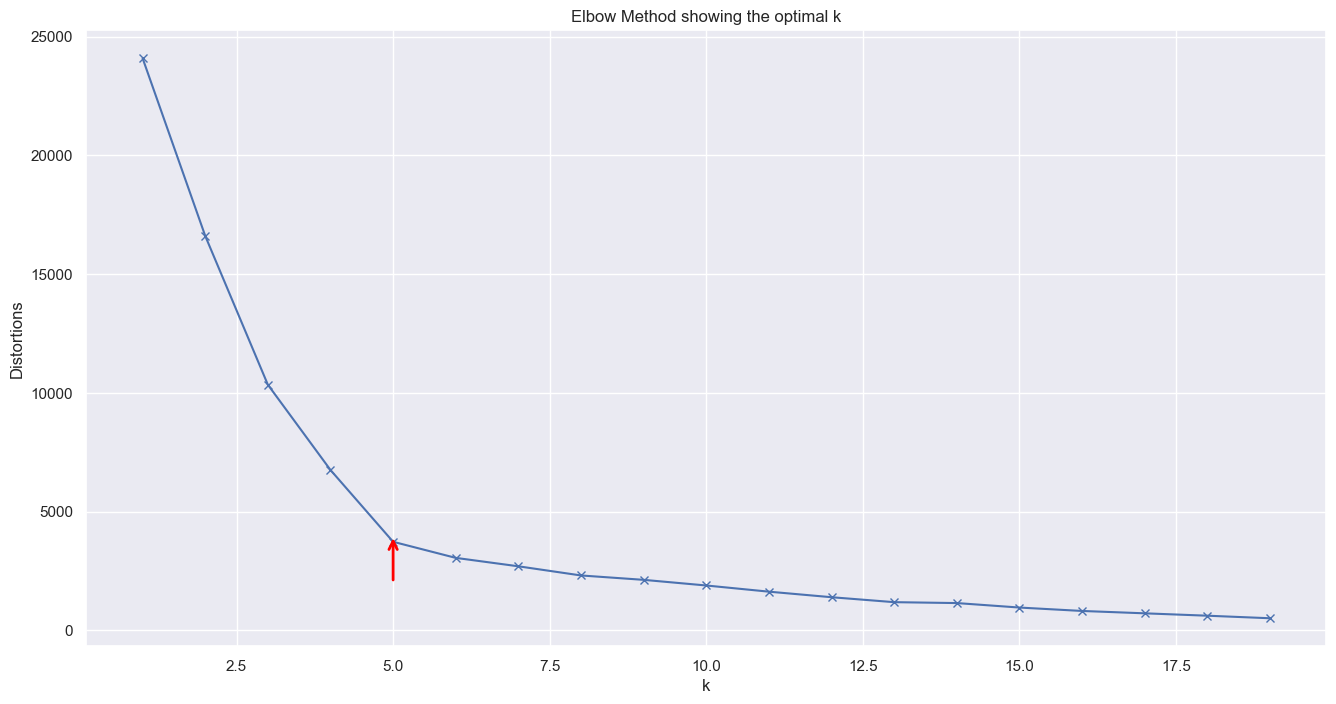

In [198]:
#Ellbow-Method --> Best Number of Clusters is 5
plt.figure(figsize = (16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (5,4000), xytext = (5,2000), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()


In [199]:
opt_clusters = 5
kmeans = KMeans(n_clusters=opt_clusters)
y_kmeans = kmeans.fit_predict(data_piv)
y_kmeans

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 0, 0, 0])

In [200]:
data_piv['Cluster'] = y_kmeans

In [204]:
data_piv["Cluster"]

Country
Albania                        0
Antigua and Barbuda            0
Argentina                      0
Armenia                        0
Australia                      0
Azerbaijan                     0
Bahamas, The                   0
Bangladesh                     0
Barbados                       0
Belarus                        0
Belize                         0
Benin                          0
Bolivia                        0
Bosnia and Herzegovina         0
Botswana                       0
Brazil                         0
Bulgaria                       0
Burundi                        0
Cambodia                       0
Cameroon                       0
Canada                         3
Chile                          0
China, People's Republic of    2
Colombia                       0
Costa Rica                     0
Croatia                        0
Cyprus                         0
Denmark                        0
Dominican Republic             0
Ecuador                        0
Eg

In [205]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_piv.values)
data_piv["pca_1"] = reduced_features[:,0]
data_piv["pca_2"] = reduced_features[:,1]

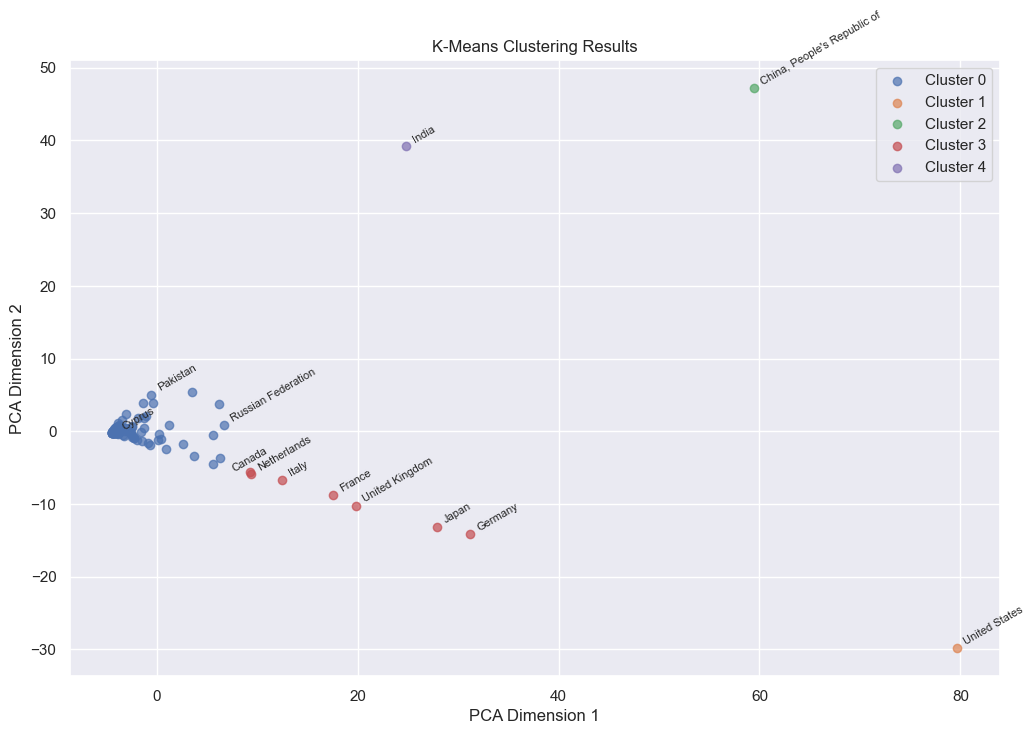

In [239]:
num_clusters=5
plt.figure(figsize=(12,8))
clusters_to_label = [1, 2, 3, 4]  # clusters you want to label

for cluster_label in range(num_clusters):
    cluster_data = data_piv[data_piv['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha=0.7
    )
    # if this is a cluster to label, add labels for its points
    if cluster_label in clusters_to_label:
        for i, row in cluster_data.iterrows():
            if i != "Canada":
                plt.text(row['pca_1']+0.5, row['pca_2']+0.5, str(i), fontsize = 8, rotation = 30)
            else: 
                plt.text(row['pca_1']-2, row['pca_2'], str(i), fontsize = 8, rotation = 30)
    else:
        for i, row in cluster_data.sample(3, random_state = 245).iterrows():
            plt.text(row['pca_1']+0.5, row['pca_2']+0.5, str(i), fontsize = 8, rotation = 30)


plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

Interpretation:

# Alternative

In [ ]:
# Alternative Idee: kmeans kann das Time Series Konzept nicht verstehen bzw. die Relevanz der zeitlichen Entwicklung. Vorher war jede Spalte einfach eine eigene Variable.
# Dementsprechend hatten wir pro Land 155 Variablen die erstmal in keinem Zusammenhang stehen
# Version 2: Wir nehmen nur die aktuellsten fünf Jahre von jeden Land und berechnen den Durchschnitt für jede Variable und basieren darauf unser Clustering
# so wollen wir ein clustering errechnen, dass die aktuelle Realität der Länder wiederspiegelt und darauf basierend die optimale Anzahl an Cluster errechnet

In [240]:
data_piv

1992                                 \
Kind                          Exports        GDP   Imports   Nat_Dis   
Country                                                                
Albania                     -0.351126  -0.223614 -0.370434 -0.138420   
Antigua and Barbuda         -0.353496  -0.224188 -0.362336 -0.138420   
Argentina                   -0.126970   0.202454 -0.192312 -0.138420   
Armenia                     -0.353917  -0.224842 -0.365388 -0.138420   
Australia                    0.302909   0.306581  0.271945  5.757967   
Azerbaijan                  -0.342618  -0.223029 -0.366854 -0.138420   
Bahamas, The                -0.341375  -0.216457 -0.352868 -0.138420   
Bangladesh                  -0.316261  -0.152672 -0.342861 -0.138420   
Barbados                    -0.350500  -0.221752 -0.361805 -0.138420   
Belarus                     -0.329409  -0.203631 -0.250565 -0.138420   
Belize                      -0.354175  -0.223864 -0.368020 -0.138420   
Benin                       -0.350106  -0.219534 -0.366727 -0.138420   
Bolivia                     -0.342509  -0.215605 -0.357979 -0.138420   
Bosnia and Herzegovina      -0.316429  -0.218202 -0.367991 -0.138420   
Botswana                    -0.335048  -0.218458 -0.347700 -0.138420   
Brazil                      -0.002290   0.414160  0.132201 -0.138420   
Bulgaria                    -0.304330  -0.208004 -0.313549 -0.138420   
Burundi                     -0.354196  -0.223214 -0.370277 -0.138420   
Cambodia                    -0.352464  -0.220946 -0.364717 -0.138420   
Cameroon                    -0.330967  -0.200016 -0.341974 -0.138420   
Canada                       1.436817   0.768310  1.476075 -0.138420   
Chile                       -0.220977  -0.147149 -0.213465 -0.138420   
China, People's Republic of  0.400505   0.597465  0.315176  9.969672   
Colombia                    -0.256709  -0.110412 -0.256963 -0.138420   
Costa Rica                  -0.326522  -0.210707 -0.335554 -0.138420   
Croatia                     -0.294135  -0.224073 -0.291095 -0.138420   
Cyprus                      -0.315194  -0.212615 -0.330844 -0.138420   
Denmark                      0.269301   0.030532  0.299017 -0.138420   
Dominican Republic          -0.327780  -0.205628 -0.320728 -0.138420   
Ecuador                     -0.319263  -0.199934 -0.319594 -0.138420   
Egypt                       -0.198904  -0.151208 -0.230389 -0.138420   
El Salvador                 -0.337847  -0.215308 -0.360275 -0.138420   
Estonia                     -0.350573  -0.221431 -0.339236 -0.138420   
Eswatini                    -0.346968  -0.222641 -0.362660 -0.138420   
Fiji                        -0.348685  -0.222250 -0.361966 -0.138420   
Finland                     -0.030282  -0.035951 -0.030363 -0.138420   
France                       3.414376   2.122022  3.175226 -0.138420   
Gabon                       -0.331853  -0.215070 -0.340831 -0.138420   
Gambia, The                 -0.355037  -0.223652 -0.368809 -0.138420   
Georgia                     -0.343803  -0.222673 -0.355790 -0.138420   
Germany                      4.958730   3.345222  5.241402 -0.138420   
Ghana                       -0.338628  -0.197761 -0.358289 -0.138420   
Greece                      -0.128260  -0.032023 -0.166239 -0.138420   
Guatemala                   -0.328185  -0.208059 -0.349023 -0.138420   
Guinea                      -0.347177  -0.217385 -0.361708 -0.138420   
Guinea-Bissau               -0.356186  -0.223608 -0.371270 -0.138420   
Haiti                       -0.355020  -0.223488 -0.369374  0.703921   
Honduras                    -0.342418  -0.216760 -0.351807 -0.138420   
Hong Kong SAR                1.801667  -0.050761  1.146091 -0.138420   
Hungary                     -0.219325  -0.160294 -0.244512 -0.138420   
Iceland                     -0.334804  -0.213148 -0.346325 -0.138420   
India                       -0.032401   0.265083 -0.069036 -0.138420   
Indonesia                    0.038471   0.056210  0.088942 -0.138420   
I

In [241]:
selected_columns = data_piv.loc[:, (slice(2017, 2022), ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population'])]
selected_columns

2017                                 \
Kind                          Exports        GDP   Imports   Nat_Dis   
Country                                                                
Albania                     -0.368961  -0.235789 -0.394882 -0.164781   
Antigua and Barbuda         -0.381554  -0.242366 -0.403942 -0.164781   
Argentina                   -0.132211   0.122359 -0.194987 -0.164781   
Armenia                     -0.369612  -0.236655 -0.394024 -0.164781   
Australia                    0.474143   0.541232  0.412007 -0.164781   
Azerbaijan                  -0.337749  -0.219709 -0.349147 -0.164781   
Bahamas, The                -0.371760  -0.236183 -0.395295 -0.164781   
Bangladesh                  -0.247971  -0.076417 -0.297338 -0.164781   
Barbados                    -0.378165  -0.240373 -0.401654 -0.164781   
Belarus                     -0.293520  -0.212130 -0.300559 -0.164781   
Belize                      -0.381087  -0.241902 -0.403552 -0.164781   
Benin                       -0.374426  -0.235991 -0.396786 -0.164781   
Bolivia                     -0.354036  -0.221748 -0.379673 -0.164781   
Bosnia and Herzegovina      -0.358553  -0.232795 -0.385346 -0.164781   
Botswana                    -0.365835  -0.234056 -0.386735 -0.164781   
Brazil                       0.309015   0.928384  0.344278 -0.164781   
Bulgaria                    -0.289007  -0.209519 -0.291238 -0.164781   
Burundi                     -0.381930  -0.241399 -0.406356 -0.164781   
Cambodia                    -0.338484  -0.230592 -0.367704 -0.164781   
Cameroon                    -0.365363  -0.222711 -0.387572 -0.164781   
Canada                       1.111782   0.693188  1.101511 -0.164781   
Chile                       -0.165024  -0.086295 -0.179177 -0.164781   
China, People's Republic of  5.395888   6.720565  6.641713  2.882781   
Colombia                    -0.219426  -0.066121 -0.269500 -0.164781   
Costa Rica                  -0.332216  -0.208840 -0.349186 -0.164781   
Croatia                     -0.318331  -0.211450 -0.326958 -0.164781   
Cyprus                      -0.284937  -0.230176 -0.357570 -0.164781   
Denmark                      0.031172  -0.054635  0.125028 -0.164781   
Dominican Republic          -0.325941  -0.197732 -0.351749 -0.164781   
Ecuador                     -0.325414  -0.183984 -0.343658 -0.164781   
Egypt                       -0.208829  -0.103062 -0.298412 -0.164781   
El Salvador                 -0.354416  -0.229018 -0.385749 -0.164781   
Estonia                     -0.334885  -0.227918 -0.347486 -0.164781   
Eswatini                    -0.378423  -0.240697 -0.401262 -0.164781   
Fiji                        -0.376572  -0.240160 -0.399670 -0.164781   
Finland                     -0.122039  -0.098104 -0.127723 -0.164781   
France                       1.891304   1.229704  1.928411 -0.164781   
Gabon                       -0.370048  -0.234726 -0.385030 -0.164781   
Gambia, The                 -0.382630  -0.242349 -0.406098 -0.164781   
Georgia                     -0.358125  -0.233978 -0.384860 -0.164781   
Germany                      3.357064   1.851578  4.654400 -0.164781   
Ghana                       -0.326220  -0.208915 -0.347334 -0.164781   
Greece                      -0.200533  -0.129776 -0.203264 -0.164781   
Guatemala                   -0.333446  -0.202534 -0.368301 -0.164781   
Guinea                      -0.374037  -0.237337 -0.393426 -0.164781   
Guinea-Bissau               -0.382894  -0.242366 -0.405743 -0.164781   
Haiti                       -0.372633  -0.234663 -0.402004 -0.164781   
Honduras                    -0.355545  -0.230064 -0.377844 -0.164781   
Hong Kong SAR                1.472251  -0.049440  1.467592 -0.164781   
Hungary                     -0.075532  -0.161946 -0.049316 -0.164781   
Iceland                     -0.358999  -0.229160 -0.373952 -0.164781   
India                        1.008128   1.262202  1.041883 -0.164781   
Indonesia                    0.122016   0.333354  0.188997 -0.164781   
I

In [177]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
average_df = pd.DataFrame()

# Durchschnitt über die ausgewählten Jahre für jede Variable
for variable in ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population']:
    # Wir benutzen .loc zum Indizieren der Jahre und xs für das zweite Level des MultiIndex
    average_df[variable] = selected_columns.loc[:, (years, variable)].mean(axis=1)

average_df


,Exports,GDP,Imports,Nat_Dis,Population
Country,,,,,
Albania,-0.363851,-0.226711,-0.394284,-0.150038,-0.253489
Antigua and Barbuda,-0.377366,-0.233823,-0.404687,-0.150038,-0.271682
Argentina,-0.183835,0.026254,-0.195720,-0.136434,0.026948
Armenia,-0.363962,-0.227725,-0.392992,-0.150038,-0.253637
Australia,0.419424,0.501355,0.474718,-0.150038,-0.104147
Azerbaijan,-0.335918,-0.209654,-0.340081,-0.150038,-0.205766
"Bahamas, The",-0.368907,-0.228570,-0.396790,-0.150038,-0.269610
Bangladesh,-0.232424,-0.052265,-0.290965,-0.150038,0.831152
Barbados,-0.373820,-0.232049,-0.402810,-0.150038,-0.270436


In [178]:
average_df.loc["China, People's Republic of"]

Exports       5.711638
GDP           7.272997
Imports       7.275208
Nat_Dis       0.884380
Population    9.054574
Name: China, People's Republic of, dtype: float64

In [244]:
#fit kmeans with different Ks to find best
distortions_avg = []
K = range(1,20)
for k in K:
    kmeans_avg = KMeans(n_clusters = k, n_init = "auto", random_state=234)
    kmeans_avg.fit(average_df)
    distortions_avg.append(kmeans_avg.inertia_)

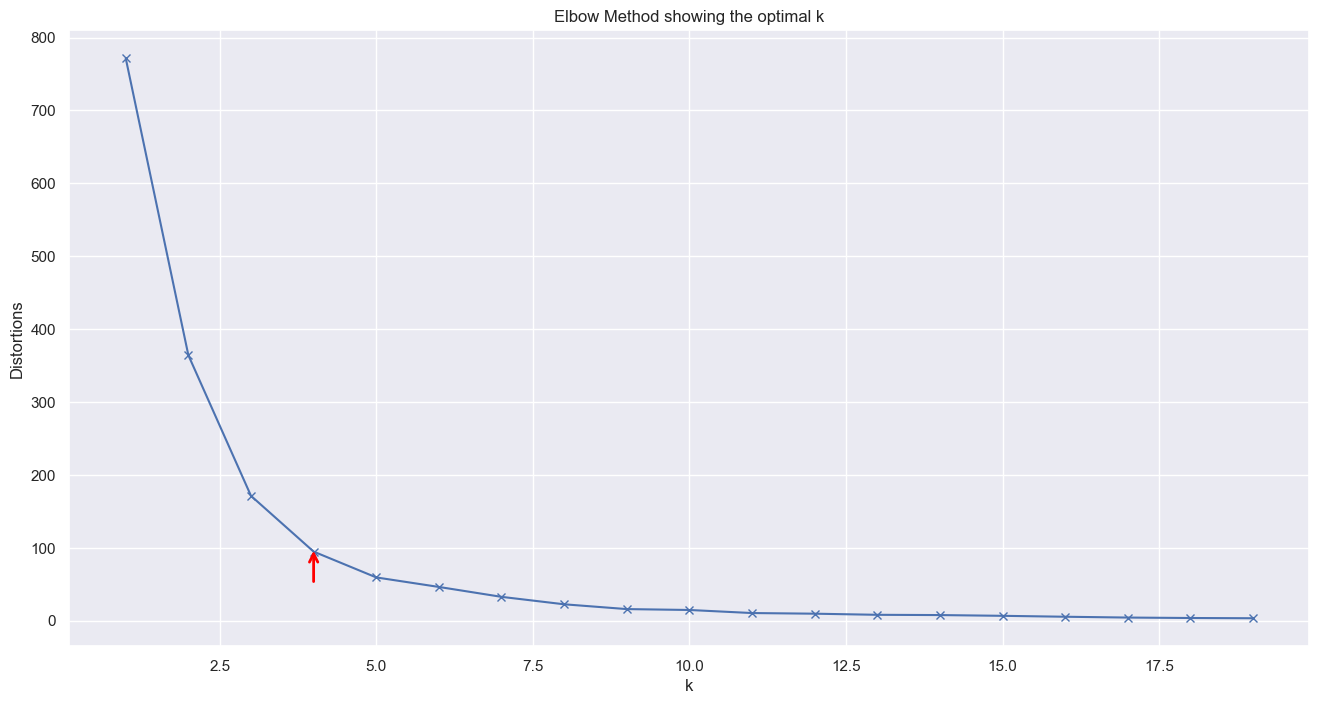

In [246]:
#Ellbow-Method --> Best Number of Clusters is 5
plt.figure(figsize = (16,8))
plt.plot(K, distortions_avg, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (4,100), xytext = (4,50), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()

In [247]:
# Optimal number of clusters is the one that you decide based on the elbow plot
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(average_df)

In [248]:
average_df['Cluster'] = pred_y

In [249]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(average_df.values)
average_df["pca_1"] = reduced_features[:,0]
average_df["pca_2"] = reduced_features[:,1]

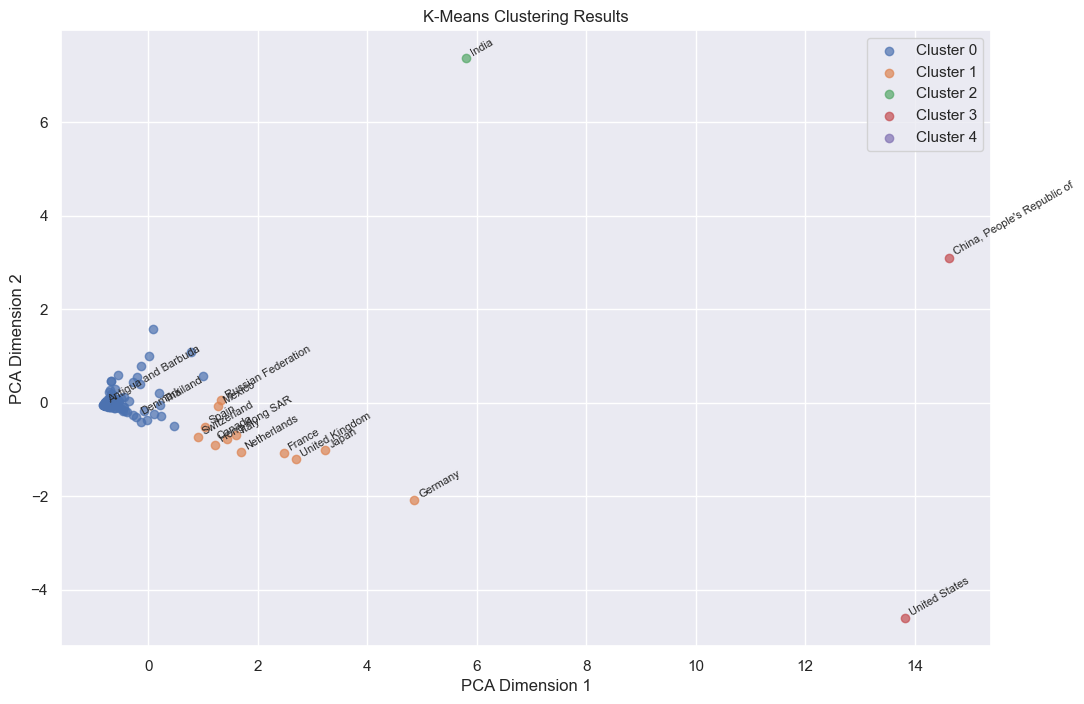

In [251]:
num_clusters=5
plt.figure(figsize=(12,8))
clusters_to_label = [1, 2, 3, 4]  # clusters you want to label

for cluster_label in range(num_clusters):
    cluster_data = average_df[average_df['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha=0.7
    )
    # if this is a cluster to label, add labels for its points
    if cluster_label in clusters_to_label:
        for i, row in cluster_data.iterrows():
            if i != "Canada":
                plt.text(row['pca_1']+0.05, row['pca_2']+0.05, str(i), fontsize = 8, rotation = 30)
            else: 
                plt.text(row['pca_1']-0.2, row['pca_2'], str(i), fontsize = 8, rotation = 30)
    else:
        for i, row in cluster_data.sample(3, random_state = 245).iterrows():
            plt.text(row['pca_1']+0.05, row['pca_2']+0.05, str(i), fontsize = 8, rotation = 30)


plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [183]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
